In [58]:
from roulette import Roulette
from core import *
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.ticker import FuncFormatter
import statistics
roulette = Roulette()

In [59]:
def martingale_betting(goal_money_won):
    money = 0
    bet_amount = 1
    money_history = []
    while money < goal_money_won:
        prev_money = money 
        money += roulette.make_even_bet(bet_amount)
        money_history.append(money)
        if money < prev_money:
            bet_amount *= 2
        else:
            bet_amount = 1
    
    return money_history

In [60]:
goal_money = [10, 100 , 500, 1000]
money_histories = dict()
for goal in goal_money:
    money_histories[goal] = []

for goal in goal_money:
    for _ in range(1000):
        money_histories[goal].append(martingale_betting(goal))
    

Analysis functions for the different money goals

In [61]:
def plot_money_histories(goal_money: int):
    for money_history in money_histories[goal_money][:10]:
        plot_money_history(money_history, minimum_line=True)

In [62]:
def plot_minimum_money(goal_money: int):
    minimum_money = []
    for money_history in money_histories[goal_money]:
        minimum_money.append(min(money_history))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(minimum_money)

    def format_ticks(value, _):
        return f'{value:.0f}'  # Adjust the formatting as needed
    
    mean = sum(minimum_money) / len(minimum_money)
    ax.axhline(mean, color='r', linestyle='dashed', linewidth=2)
    ax.text(0.05, 0.97, f'Mean: {mean:.2f}', transform=ax.transAxes, color='r')

    median = statistics.median(minimum_money)
    ax.axhline(median, color='g', linestyle='dashed', linewidth=2)
    ax.text(0.05, 0.90, f'Median: {median:.2f}', transform=ax.transAxes, color='g')

    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        
    plt.show()

## Analysis when the goal is to win 10 units

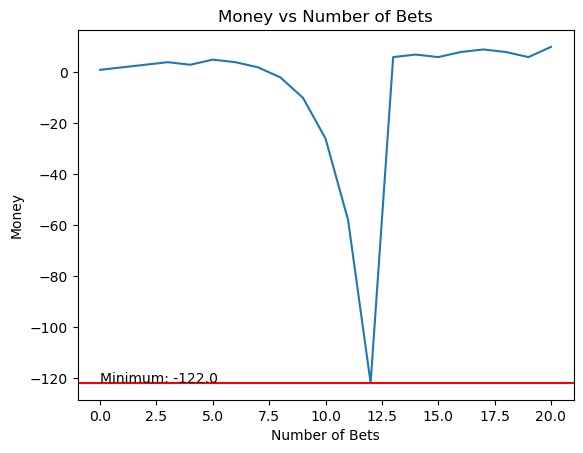

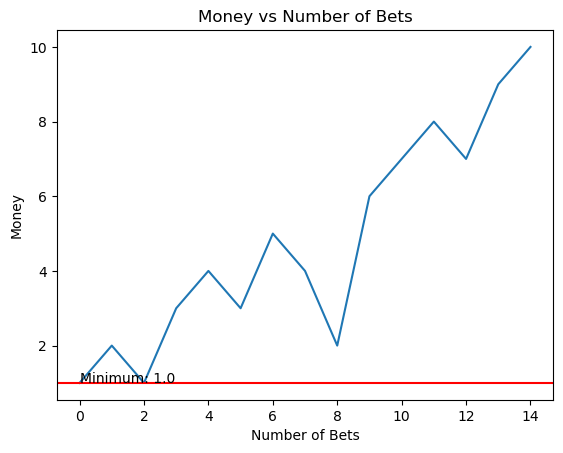

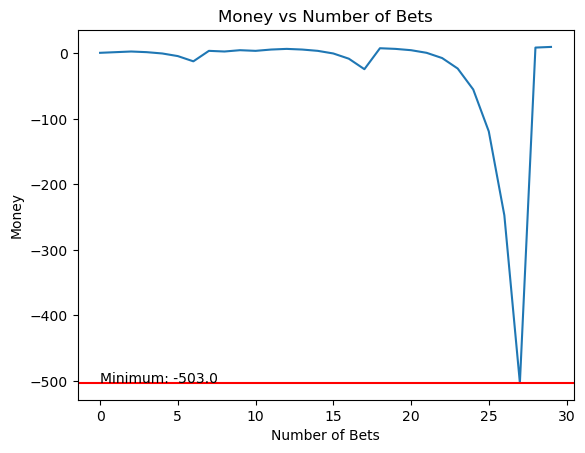

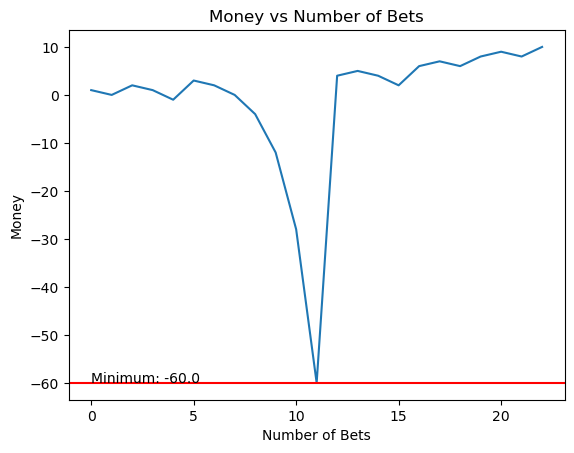

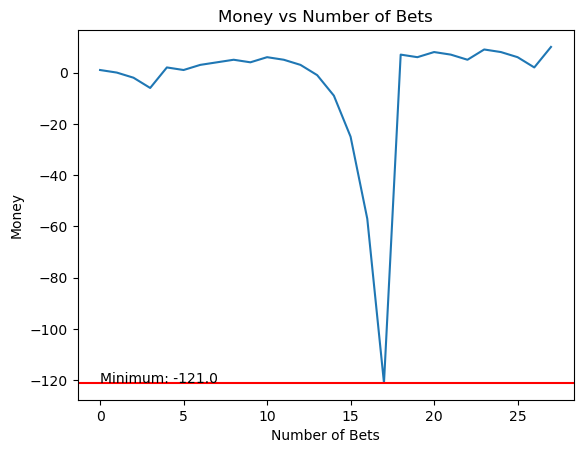

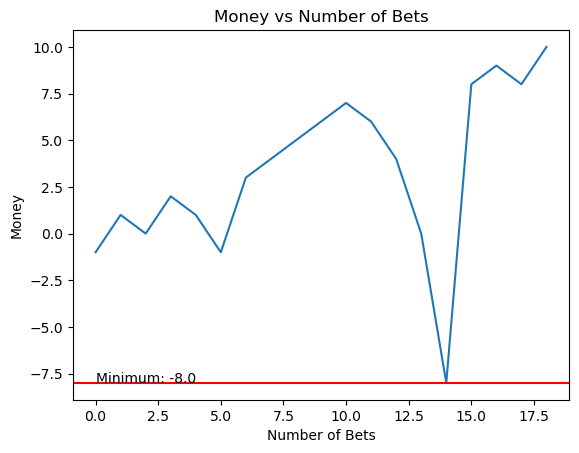

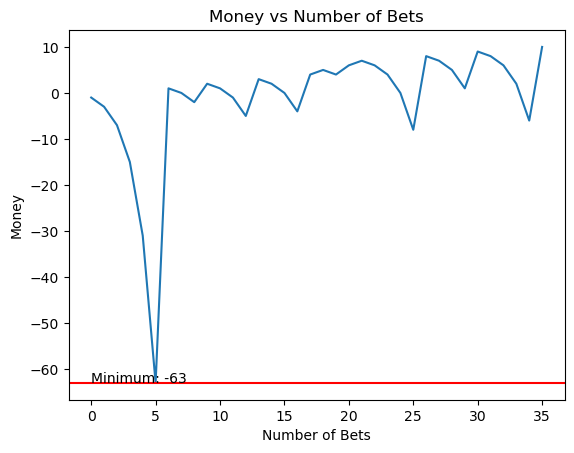

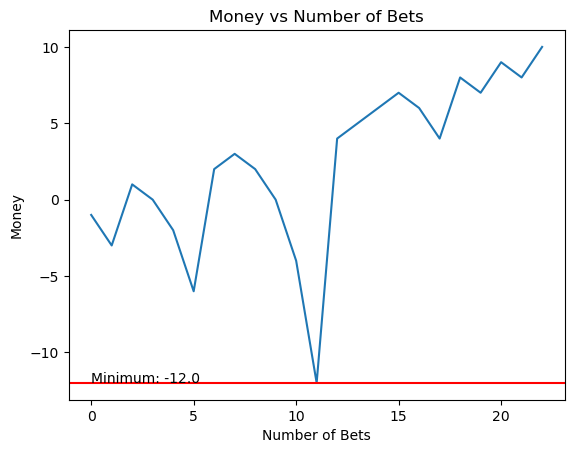

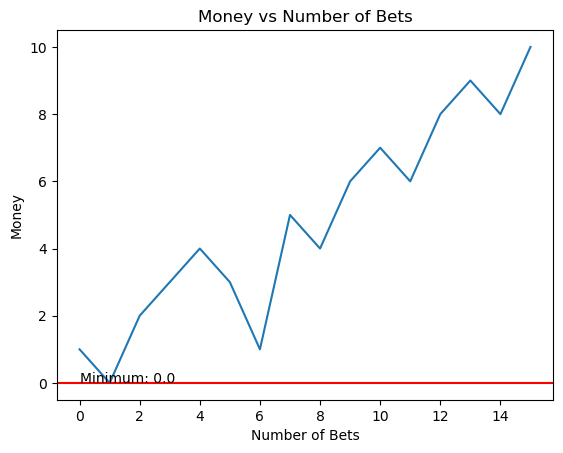

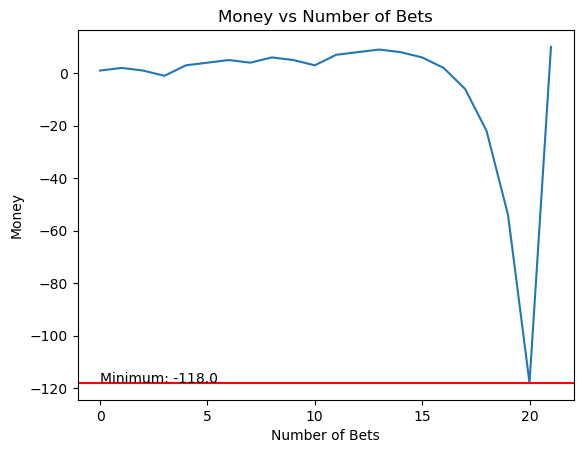

In [63]:
plot_money_histories(10)

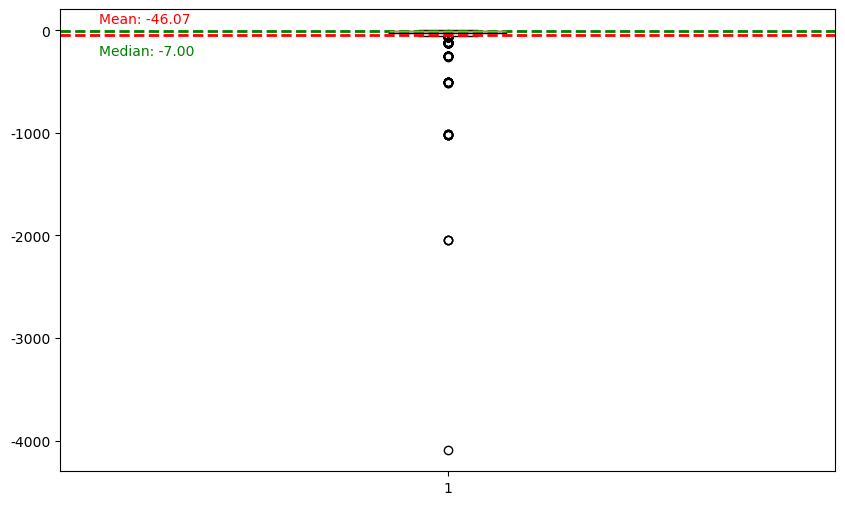

In [64]:
plot_minimum_money(10)

## Analysis when the goal is to win 100 units

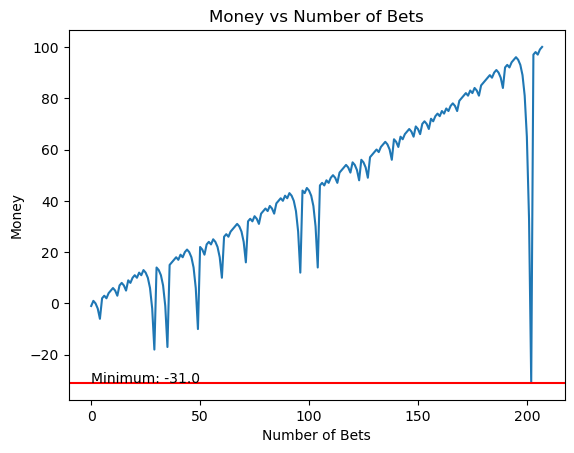

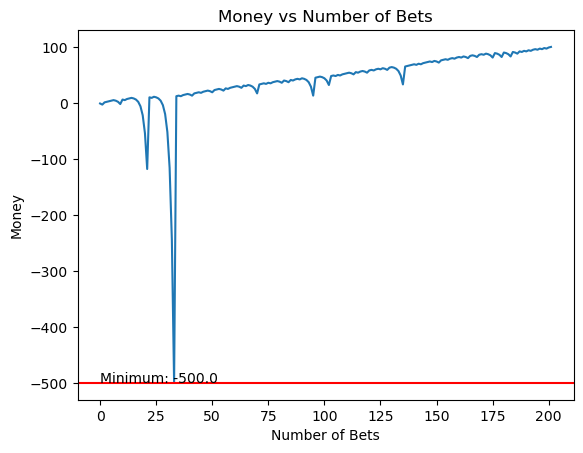

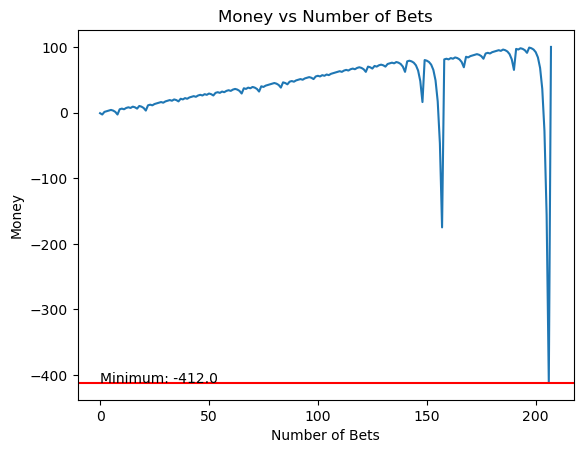

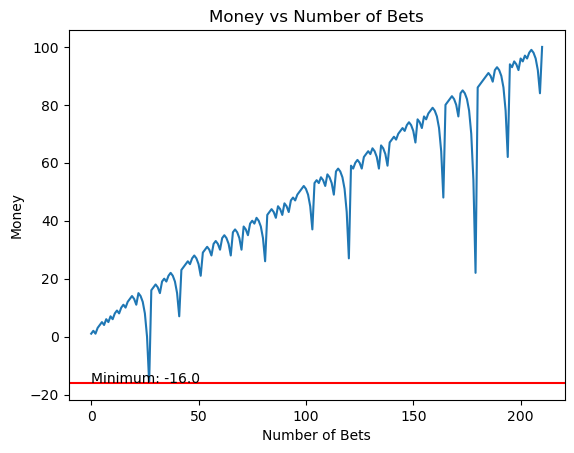

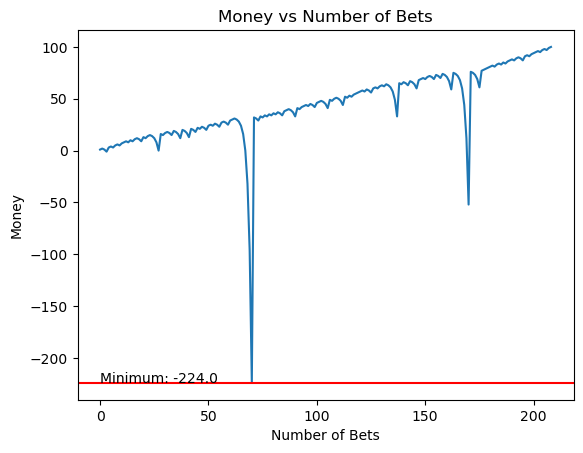

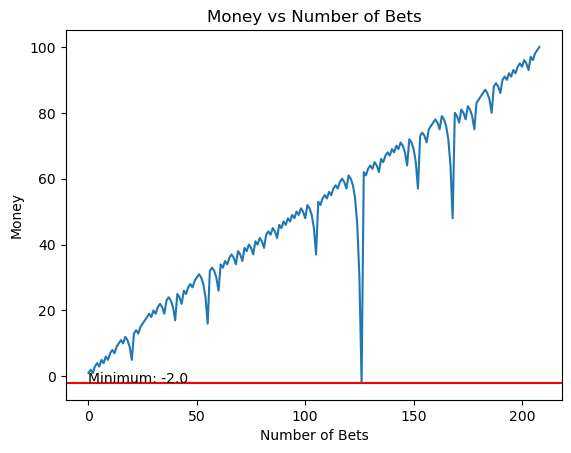

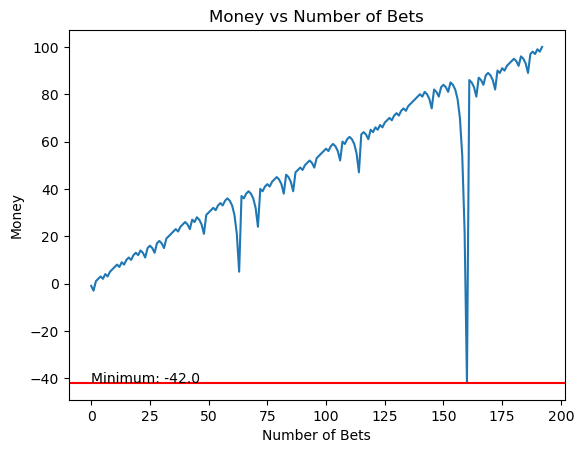

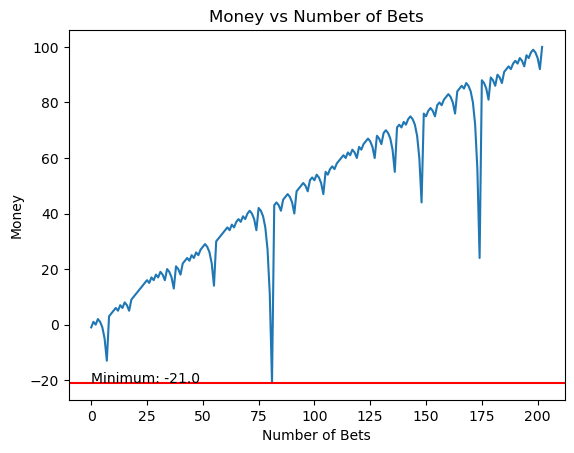

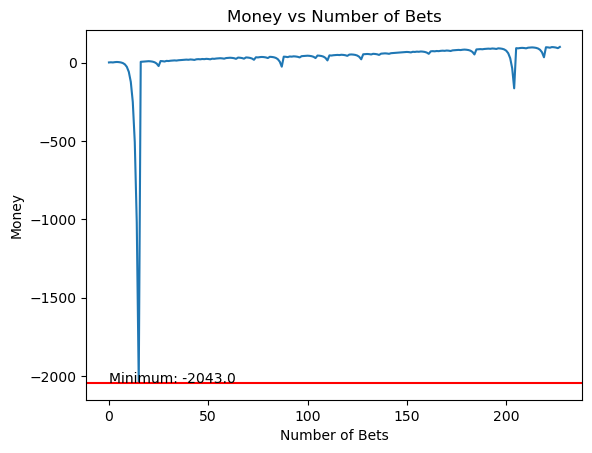

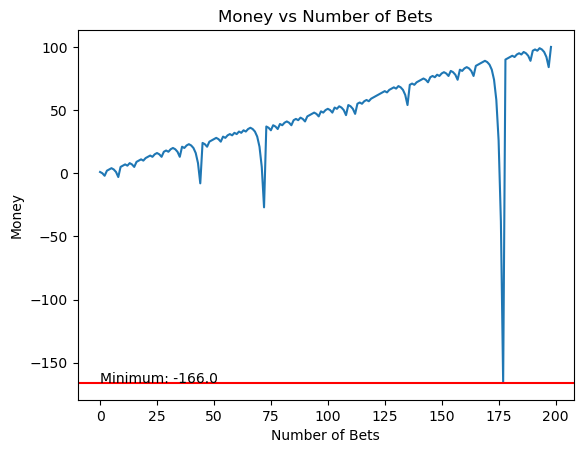

In [65]:
plot_money_histories(100)

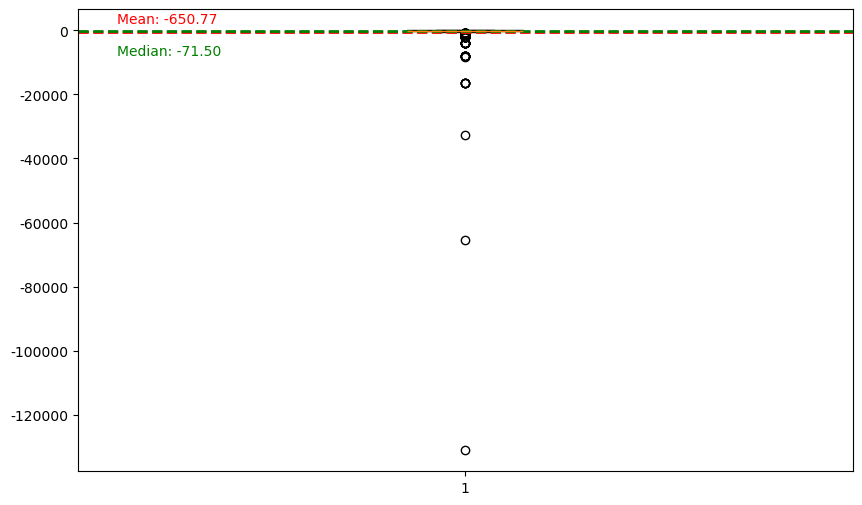

In [66]:
plot_minimum_money(100)

## Analysis when the goal is to win 500 units

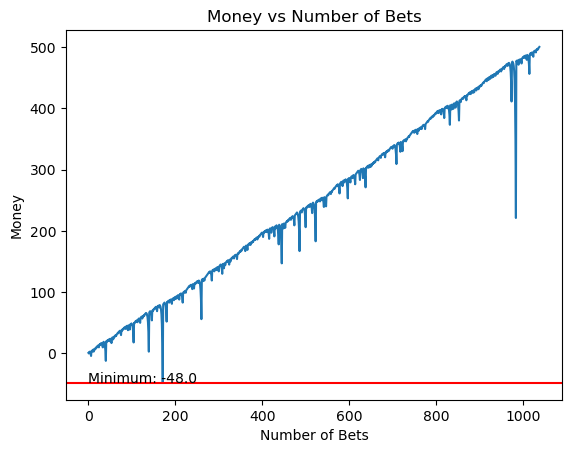

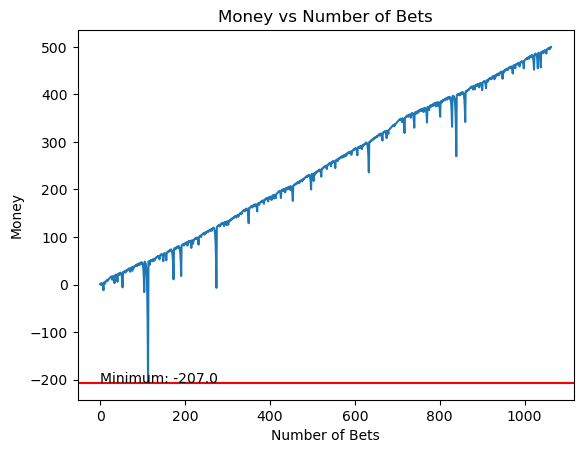

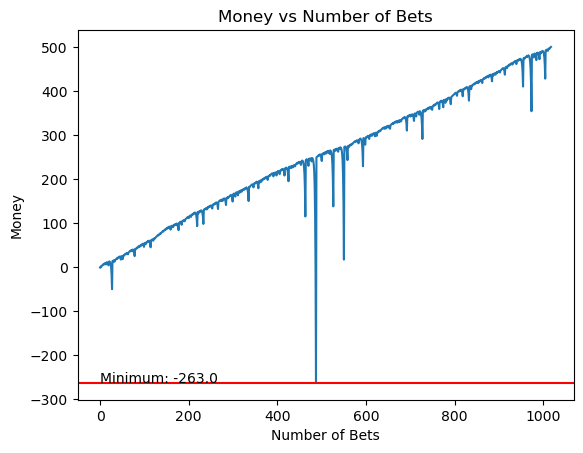

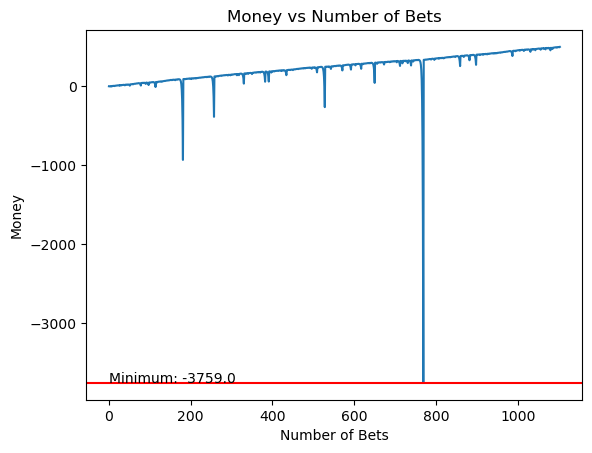

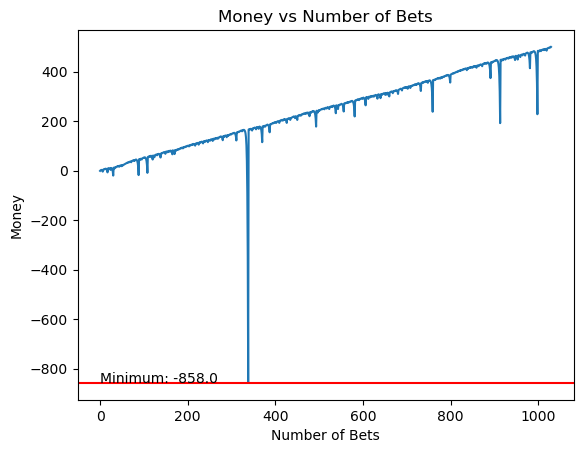

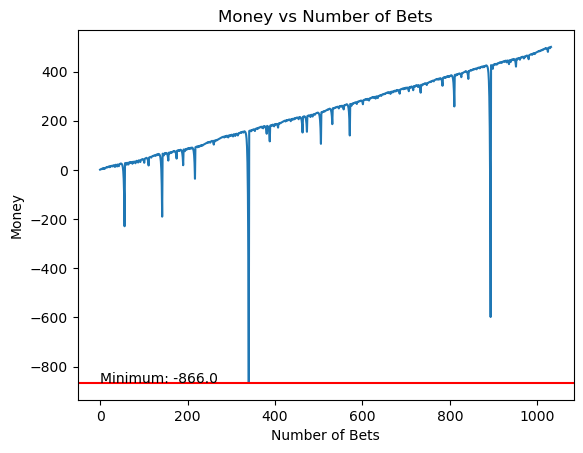

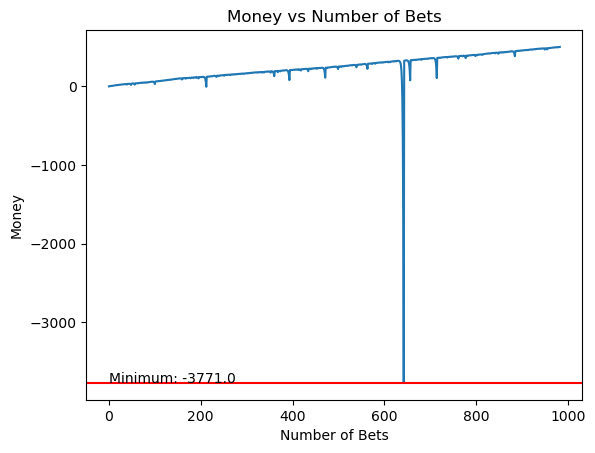

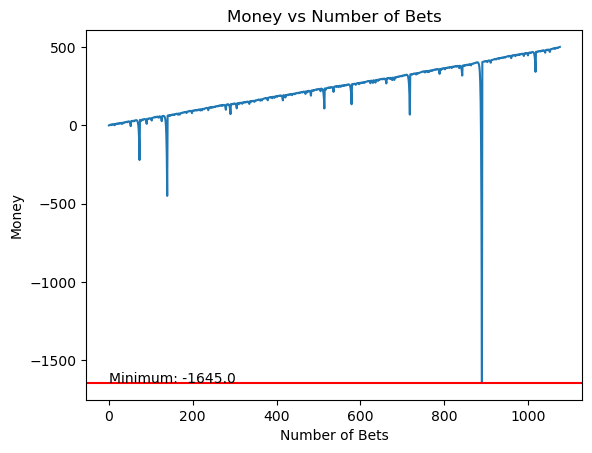

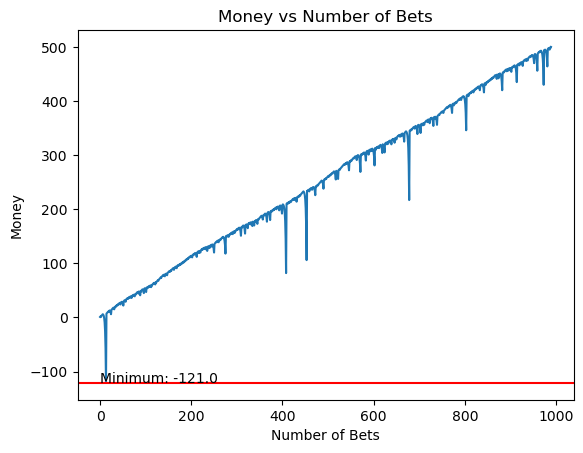

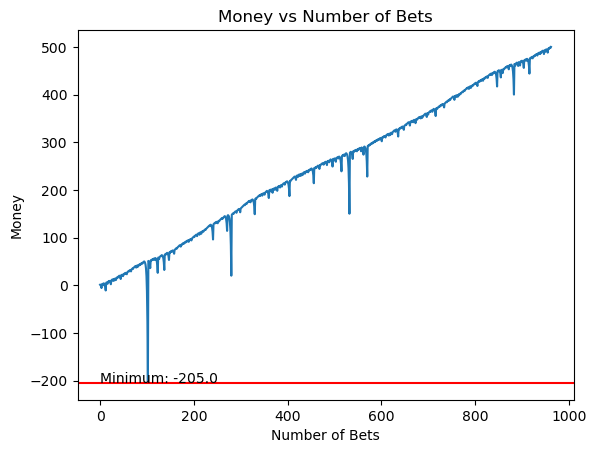

In [67]:
plot_money_histories(500)

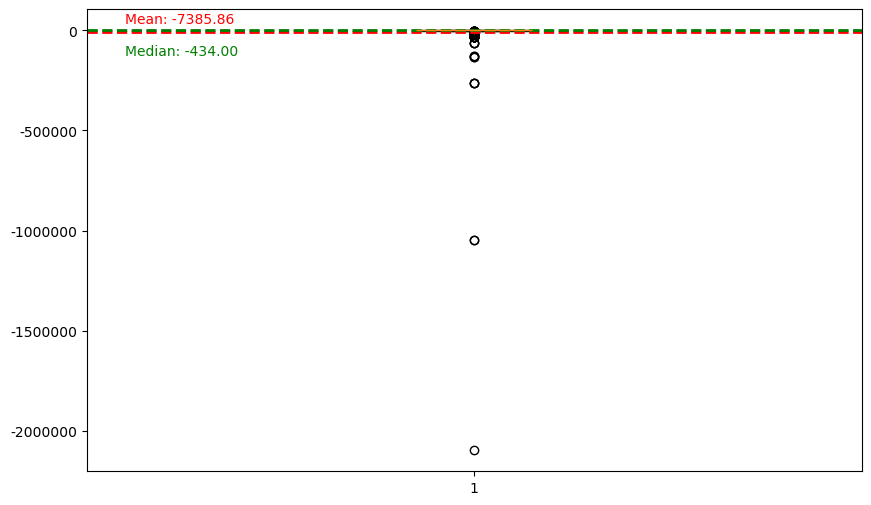

In [68]:
plot_minimum_money(500)

## Analysis when the goal is to win 1000 units

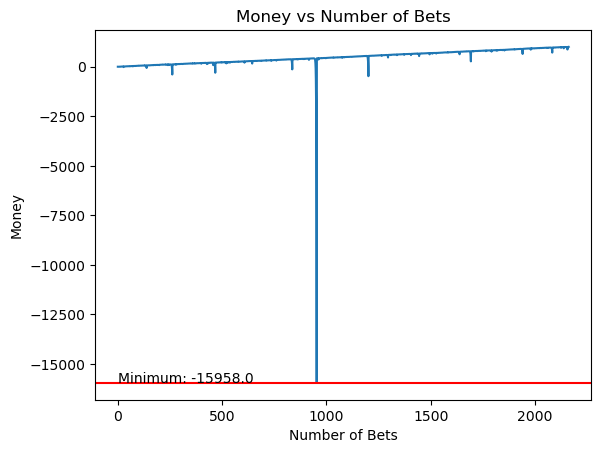

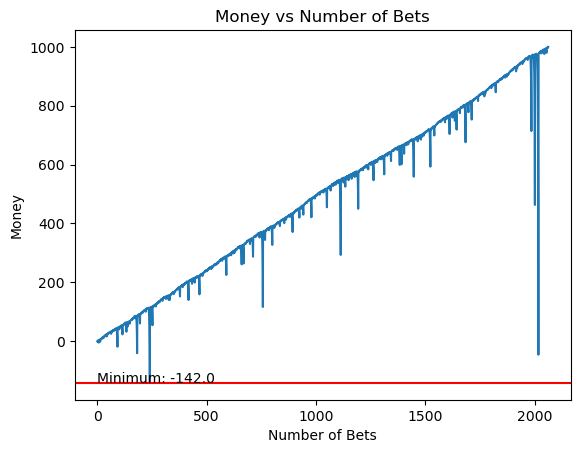

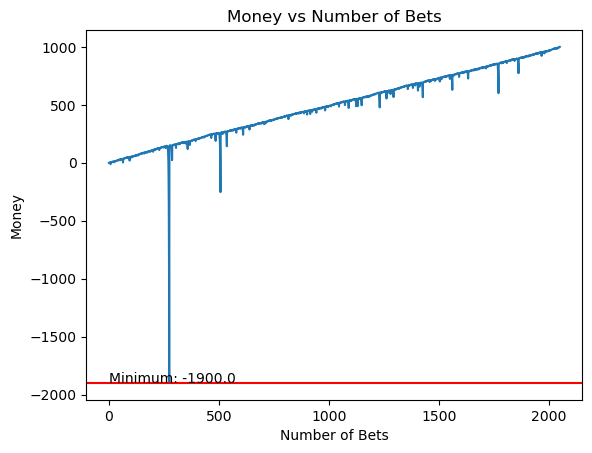

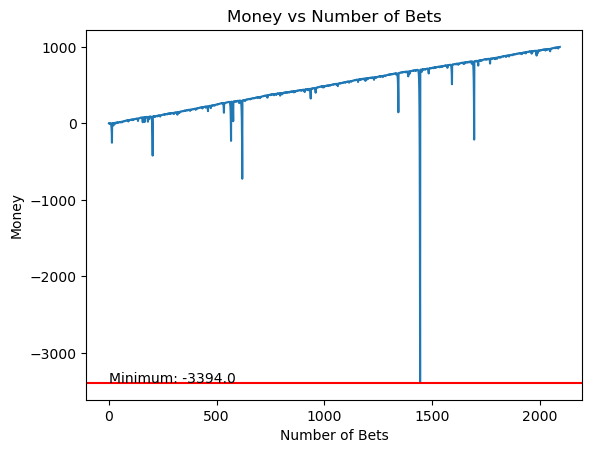

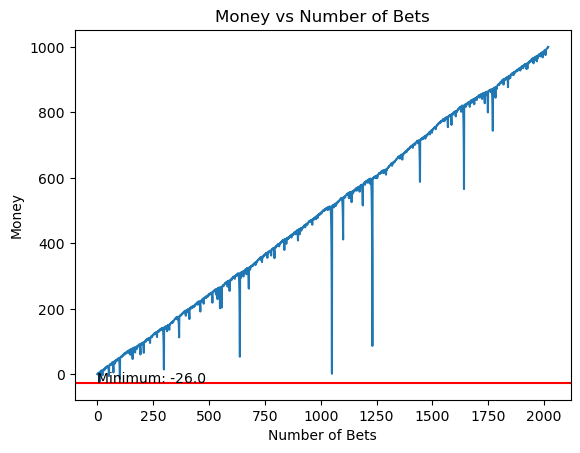

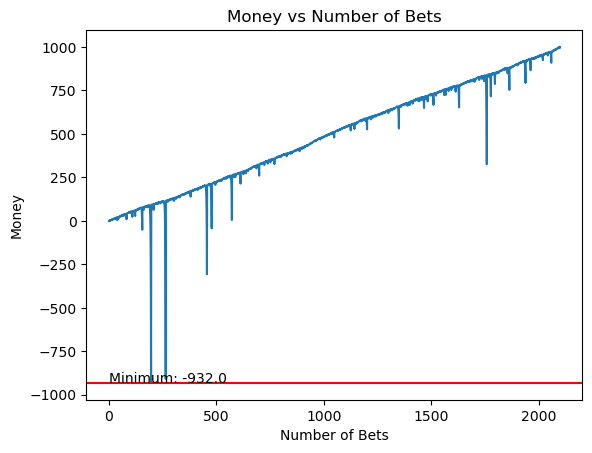

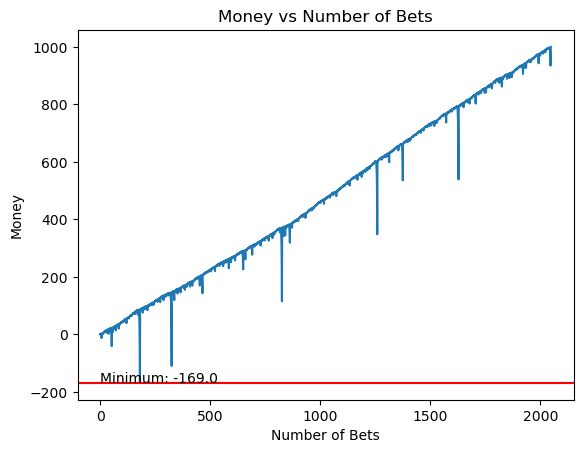

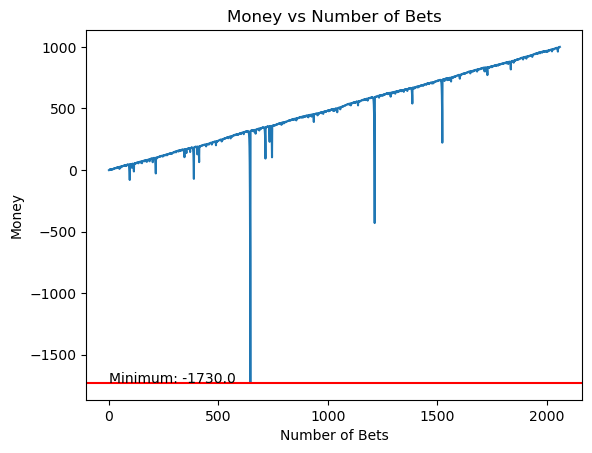

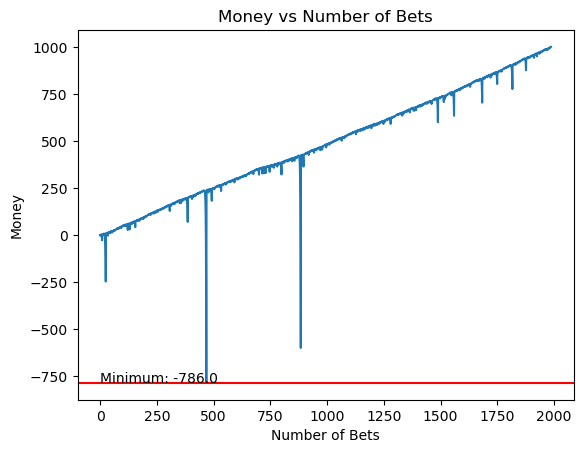

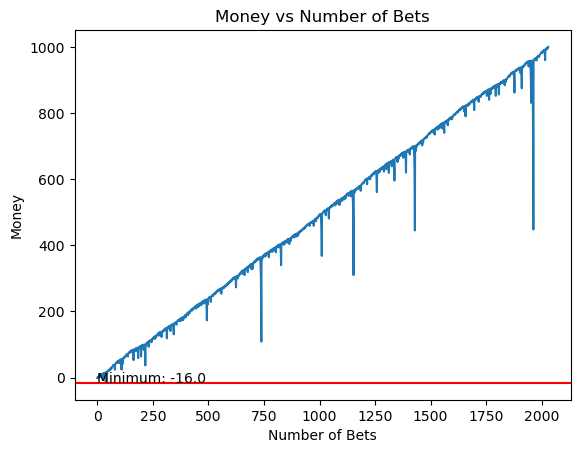

In [69]:
plot_money_histories(1000)

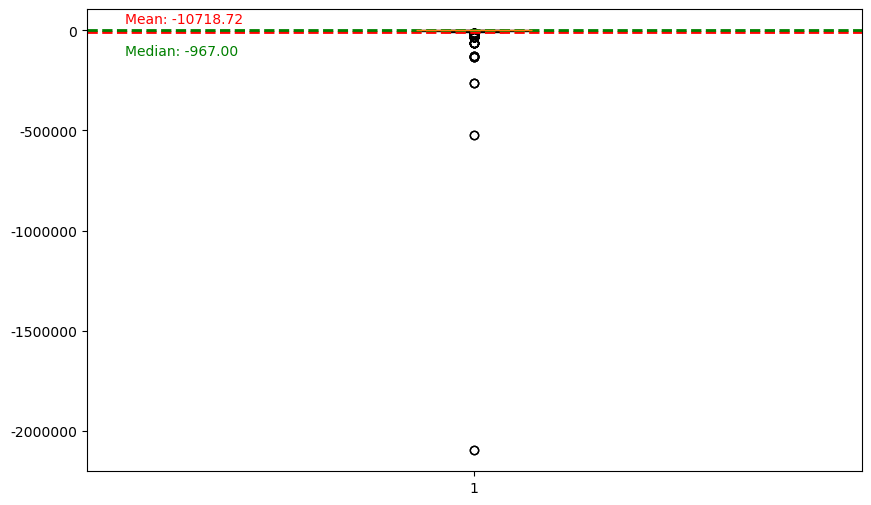

In [70]:
plot_minimum_money(1000)